In [1]:
# connect to google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
# import library
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_regression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score

In [3]:
# read dataset
df = pd.read_excel('./drive/MyDrive/2023Spring/Dataset/final/area2.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1052 entries, 0 to 1051
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 1052 non-null   object 
 1   Drought Level Index  1052 non-null   float64
 2   Precipitation_in     1052 non-null   float64
 3   Temperature_C        1052 non-null   float64
 4   Vegetation           1052 non-null   float64
 5   Evapotranspiration   1052 non-null   float64
 6   County               1052 non-null   object 
dtypes: float64(5), object(2)
memory usage: 57.7+ KB


Drought Level Index  Precipitation_in  Temperature_C  \
Drought Level Index             1.000000         -0.176035       0.203081   
Precipitation_in               -0.176035          1.000000      -0.043241   
Temperature_C                   0.203081         -0.043241       1.000000   
Vegetation                     -0.235161          0.278347       0.032232   
Evapotranspiration             -0.255927          0.338180       0.183297   

                     Vegetation  Evapotranspiration  
Drought Level Index   -0.235161           -0.255927  
Precipitation_in       0.278347            0.338180  
Temperature_C          0.032232            0.183297  
Vegetation             1.000000            0.546427  
Evapotranspiration     0.546427            1.000000

<ipython-input-4-b04f18f2feea>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask =  np.triu(np.ones_like(corr, dtype=np.bool))


<AxesSubplot:>

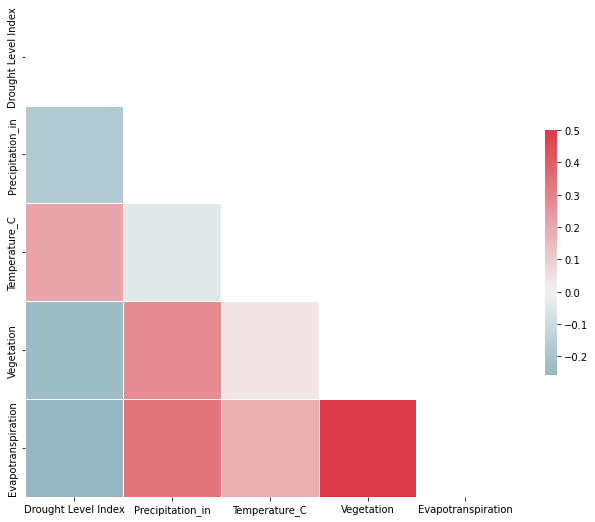

In [4]:
# compute correlations and plot correlation matrix
corr = df.corr(method='kendall')
display(corr)

# generate a mask for the upper triangle
mask =  np.triu(np.ones_like(corr, dtype=np.bool))

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.5, center=0,
            square=True, linewidths=0.5, cbar_kws={'shrink': 0.5})

In [40]:
# training set and test set
Y = df['Drought Level Index']
X = df.iloc[:,2:6]
scale = StandardScaler()
scaledX = scale.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

In [41]:
# perform regression using all variables
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
print_model = model.summary()
print(print_model)

                             OLS Regression Results                            
Dep. Variable:     Drought Level Index   R-squared:                       0.276
Model:                             OLS   Adj. R-squared:                  0.272
Method:                  Least Squares   F-statistic:                     79.60
Date:                 Wed, 01 Mar 2023   Prob (F-statistic):           3.03e-57
Time:                         22:16:23   Log-Likelihood:                -1393.6
No. Observations:                  841   AIC:                             2797.
Df Residuals:                      836   BIC:                             2821.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [42]:
X_test = sm.add_constant(X_test)
pred = model.predict(X_test) 
print('R squared:', metrics.r2_score(y_test, pred))
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R squared: 0.3321623842791651
MAE: 1.0763032977266829
MSE: 1.8737345673601862
RMSE: 1.3688442451061356


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


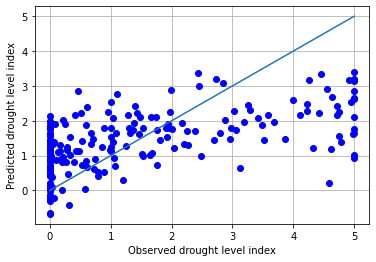

In [43]:
fig = plt.figure(figsize=(6,4))
plt.plot(y_test, pred, 'bo')
plt.plot(y_test, y_test + 0, linestyle='solid')
plt.xlabel('Observed drought level index')
plt.ylabel('Predicted drought level index')
plt.grid()
plt.show()